# Inicializações

In [1]:
url = "http://vps-40d69db1.vps.ovh.ca:21446/api/CotacaoIntradayAcaoResultadoValors/obtemPorRegraData?idRegra=1&diaNum=20210101"

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Execuções

Data :  01/01/2022 05:39:58
Total:  136298
Ticker:  48


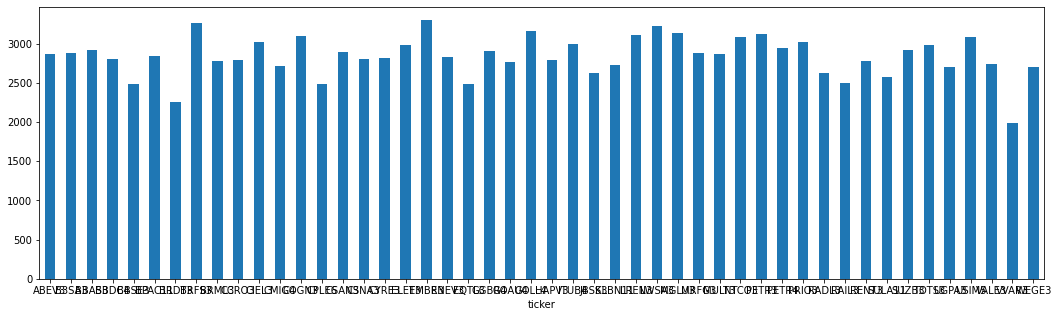

    ticker  total
0    ABEV3   2864
1    B3SA3   2878
2    BBAS3   2920
3    BBDC4   2805
4    BBSE3   2490
5   BPAC11   2845
6    BRDT3   2260
7    BRFS3   3267
8    BRML3   2777
9    CCRO3   2790
10   CIEL3   3019
11   CMIG4   2710
12   COGN3   3104
13   CPLE6   2490
14   CSAN3   2900
15   CSNA3   2799
16   CYRE3   2814
17   ELET3   2988
18   EMBR3   3303
19   ENEV3   2828
20   EQTL3   2490
21   GGBR4   2903
22   GOAU4   2767
23   GOLL4   3160
24   HAPV3   2798
25   ITUB4   3000
26   JBSS3   2628
27  KLBN11   2723
28   LREN3   3109
29   LWSA3   3232
30   MGLU3   3133
31   MRFG3   2875
32   MULT3   2864
33   NTCO3   3086
34   PETR3   3127
35   PETR4   2939
36   PRIO3   3020
37   RADL3   2620
38   RAIL3   2494
39   RENT3   2781
40  SULA11   2569
41   SUZB3   2921
42   TOTS3   2985
43   UGPA3   2705
44   USIM5   3081
45   VALE3   2744
46   VVAR3   1990
47   WEGE3   2703


In [30]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)
dfTicker = df.groupby(['ticker']).agg('qtde').sum().reset_index(name ='total')

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

print('Data : ' , dt_string)
print('Total: ' , df.agg('qtde').sum())
print('Ticker: ' , len(dfTicker))


dfTicker.plot.bar(x='ticker', y='total', rot=0, figsize=(18,5), legend=None)
plt.show()

print(dfTicker)

In [4]:
type(dfTicker)

pandas.core.frame.DataFrame

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns

Index(['ticker', 'resultado', 'qtde'], dtype='object')

# Como colocar percentual por ticker ???

In [5]:
df.head()

,ticker,resultado,qtde
0,ABEV3,-1,304
1,ABEV3,0,1623
2,ABEV3,1,937
3,B3SA3,-1,1836
4,B3SA3,0,1042


In [19]:
dfABEV3 = df.loc[df.ticker.isin(['ABEV3','B3SA3'])]

In [20]:
dfABEV3.head()

,ticker,resultado,qtde
0,ABEV3,-1,304
1,ABEV3,0,1623
2,ABEV3,1,937
3,B3SA3,-1,1836
4,B3SA3,0,1042


In [21]:

dfABEV3['percentual'] = (dfABEV3['qtde'] / 
                      dfABEV3['qtde'].sum()) * 100

/tmp/ipykernel_1249779/4215313444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfABEV3['percentual'] = (dfABEV3['qtde'] /


In [22]:
dfABEV3.head()

,ticker,resultado,qtde,percentual
0,ABEV3,-1,304,5.294323
1,ABEV3,0,1623,28.265413
2,ABEV3,1,937,16.318356
3,B3SA3,-1,1836,31.974922
4,B3SA3,0,1042,18.146987


# Exemplo com o que eu quero (31-12-2021)

In [23]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
               'office_id': list(range(1, 7)) * 2,
               'sales': [np.random.randint(100000, 999999) for _ in range(12)]})

state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
state = df.groupby(['state']).agg({'sales': 'sum'})
state_office.div(state, level='state') * 100

sales
state office_id           
AZ    2          16.981365
      4          19.250033
      6          63.768601
CA    1          19.331879
      3          33.858747
      5          46.809373
CO    1          36.851857
      3          19.874290
      5          43.273852
WA    2          34.707233
      4          35.511259
      6          29.781508

In [24]:
df

,state,office_id,sales
0,CA,1,405711
1,WA,2,535829
2,CO,3,217952
3,AZ,4,252315
4,CA,5,982371
5,WA,6,459783
6,CO,1,404137
7,AZ,2,222579
8,CA,3,710581
9,WA,4,548242


In [25]:
state_office

sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581
      5          982371
CO    1          404137
      3          217952
      5          474564
WA    2          535829
      4          548242
      6          459783

In [27]:
agrupado_por_ticker = df.groupby(['ticker', 'resultado']).agg({'total': 'qtde'})
agrupado_por_ticker.head()

KeyError: 'ticker'

## Piores ( venda )

In [31]:
df.head()

,ticker,resultado,qtde
0,ABEV3,-1,304
1,ABEV3,0,1623
2,ABEV3,1,937
3,B3SA3,-1,1836
4,B3SA3,0,1042


In [32]:
dfVenda = df.loc[df['resultado']==-1]

In [33]:
dfVenda.head()

,ticker,resultado,qtde
0,ABEV3,-1,304
3,B3SA3,-1,1836
5,BBAS3,-1,535
8,BBDC4,-1,1019
11,BBSE3,-1,1012


In [36]:
dfVenda.sort_values(by='qtde', ascending=False).head(10)

,ticker,resultado,qtde
89,MGLU3,-1,2254
86,LWSA3,-1,2250
35,COGN3,-1,1861
3,B3SA3,-1,1836
83,LREN3,-1,1829
47,CYRE3,-1,1822
68,GOLL4,-1,1768
14,BPAC11,-1,1636
128,UGPA3,-1,1556
23,BRML3,-1,1548
